In [1]:
import warnings
warnings.filterwarnings('ignore')
    
import os
import traceback
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from sklearn.preprocessing import MinMaxScaler
    
import pandas as pd
import seaborn as sns
import numpy as np 

In [15]:
ds_names = [ 'colon', 'Lymphoma', 'SRBCT', 'GLIOMA',
            'Leukemia',  'CNS', 'Prostate_GE',  'TOX_171',
            'CLL_SUB_111', 'GLI_85', 'lung', 'MLL', 'ovarian', ]

In [16]:
alg_names = ['CFS', 'BORUTA']

In [18]:
for alg in alg_names:
    question_max = pd.DataFrame(columns=['NAME', alg + '_MLP', alg + '_SVC', alg + '_RF'])
    question_avg = pd.DataFrame(columns=['NAME', alg + '_MLP', alg + '_SVC', alg + '_RF'])

    for ds in ds_names:
        df_MLP = pd.read_csv('./results/' + ds + '/ranked_list_False_NN.csv')
        MLP_pos = df_MLP.index[df_MLP.alg_name == alg][0]

        df_SVC = pd.read_csv('./results/' + ds + '/ranked_list_False_SVC.csv')
        SVC_pos = df_SVC.index[df_SVC.alg_name == alg][0]

        df_RF = pd.read_csv('./results/' + ds + '/ranked_list_False_RF.csv')
        RF_pos = df_RF.index[df_RF.alg_name == alg][0]

        max_val = pd.DataFrame({'NAME': [ds],
                                    alg + '_MLP': [df_MLP.at[MLP_pos,'max_f1_val']],
                                    alg + '_SVC': [df_SVC.at[SVC_pos,'max_f1_val']],
                                    alg + '_RF': [df_RF.at[RF_pos,'max_f1_val']]
                                    })

        avg_val = pd.DataFrame({'NAME': [ds],
                                    alg + '_MLP': [df_MLP.at[MLP_pos,'avg_f1_val']],
                                    alg + '_SVC': [df_SVC.at[SVC_pos,'avg_f1_val']],
                                    alg + '_RF': [df_RF.at[RF_pos,'avg_f1_val']]
                                    })
        
        question_max = question_max.append(max_val, ignore_index=True)
        question_avg = question_avg.append(avg_val, ignore_index=True)
        
    question_max.to_csv('./results/' + alg + '_max.csv', index=None, header=True)
    question_avg.to_csv('./results/' + alg + '_avg.csv', index=None, header=True)
    

# MAX

In [26]:
df = pd.read_csv('./results/BORUTA_max.csv') 

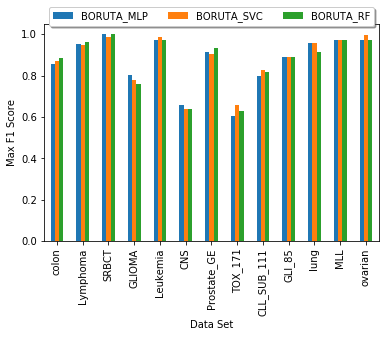

In [27]:
ax = df.plot(x="NAME", y=["BORUTA_MLP", "BORUTA_SVC", "BORUTA_RF"], kind="bar")
ax.set_xlabel("Data Set")
ax.set_ylabel("Max F1 Score")
ax.legend(loc='upper center', bbox_to_anchor=(.5, 1.1),
          ncol=3, fancybox=True, shadow=True)

In [28]:
df = pd.read_csv('./results/CFS_max.csv') 

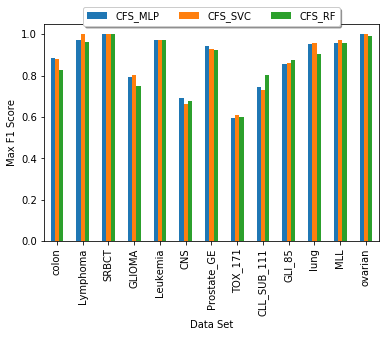

In [29]:
ax = df.plot(x="NAME", y=["CFS_MLP", "CFS_SVC", "CFS_RF"], kind="bar")
ax.set_xlabel("Data Set")
ax.set_ylabel("Max F1 Score")
ax.legend(loc='upper center', bbox_to_anchor=(.5, 1.1),
          ncol=3, fancybox=True, shadow=True)

# AVG

In [30]:
df = pd.read_csv('./results/BORUTA_avg.csv') 

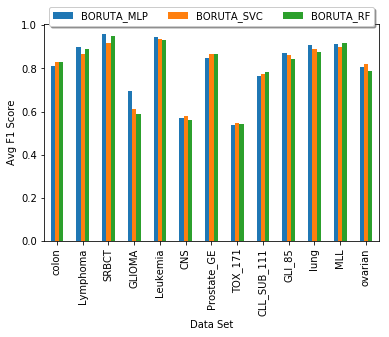

In [31]:
ax = df.plot(x="NAME", y=["BORUTA_MLP", "BORUTA_SVC", "BORUTA_RF"], kind="bar")
ax.set_xlabel("Data Set")
ax.set_ylabel("Avg F1 Score")
ax.legend(loc='upper center', bbox_to_anchor=(.5, 1.1),
          ncol=3, fancybox=True, shadow=True)

In [32]:
df = pd.read_csv('./results/CFS_avg.csv') 

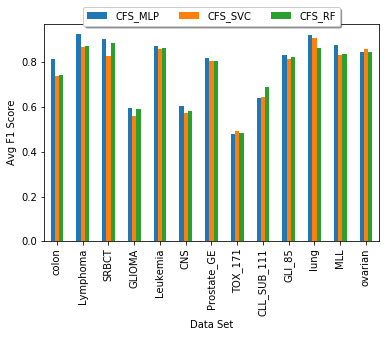

In [33]:
ax = df.plot(x="NAME", y=["CFS_MLP", "CFS_SVC", "CFS_RF"], kind="bar")
ax.set_xlabel("Data Set")
ax.set_ylabel("Avg F1 Score")
ax.legend(loc='upper center', bbox_to_anchor=(.5, 1.1),
          ncol=3, fancybox=True, shadow=True)